In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
Find the linear regression equation for this data for brain weight to body weight.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.head(20)

,Brain,Body
0,3.385,44.50
1,0.480,15.50
2,1.350,8.10
3,465.000,423.00
4,36.330,119.50
5,27.660,115.00
6,14.830,98.20
7,1.040,5.50
8,4.190,58.00
9,0.425,6.40


In [ ]:
df.shape

(62, 2)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


OUTLIERS OF BRAIN


In [ ]:
q1 = df.Brain.quantile(0.25)
q3= df.Brain.quantile(0.75)
iqr= q3-q1

In [ ]:
upperlimit= 1.5*iqr+q3
lowerlimit = 1.5*iqr-q1

In [ ]:
df.Brain= df.Brain.clip(lowerlimit,upperlimit)

outliers of body

In [ ]:
q1=df.Body.quantile(0.25)
q3=df.Body.quantile(0.75)
iqr= q3-q1

In [ ]:
upperlimit= 1.5*iqr+q3
lowerlimit = 1.5*iqr-q1

In [ ]:
df.Body= df.Body.clip(lowerlimit,upperlimit)

drop duplicates

In [ ]:
df = df.drop_duplicates()

check for null


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

check data types


In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

plot a scatter plot

Text(0, 0.5, 'Brain Weight')

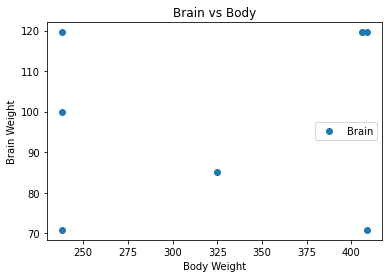

In [ ]:
df.plot(x= "Body",y="Brain",style = "o")
plt.title("Brain vs Body")
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")

check for co-relation

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.138947
Body,0.138947,1.000000


there is a good linear relation between the feature and the predicted variable

put the features in X variable and target varaible in y

In [ ]:
X= df.loc[:,["Body"]].values
y = df.loc[:,["Brain"]].values

splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape,X_test.shape

((5, 1), (2, 1))

modelling


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test,y_test)
y_pred = regressor.predict(X_test)

In [ ]:
regressor.intercept_ #c

array([7667.72625])

In [ ]:
regressor.coef_ #m

array([[-18.59142857]])

r2 score

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 1.0


plotting data and equation


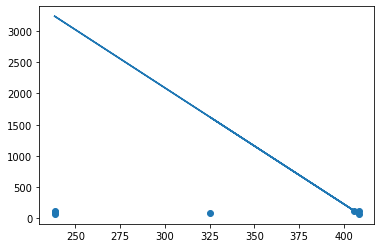

In [ ]:
plt.scatter(X,y)
plt.plot(X,regressor.predict(X))

equation

In [ ]:
C = regressor.intercept_
M = regressor.coef_
yd = M*X+C